## AB Test in R
- https://tech.leverages.jp/entry/2019/04/24/113000
![](https://i.ytimg.com/vi/OxMQORNh2E4/maxresdefault.jpg)

In [4]:
cvr <- matrix(c(4000-225, 225, 5000-367, 367), nrow=2, ncol=2, byrow=T)
cvr

3775,225
4633,367


In [5]:
chisq.test(cvr)


	Pearson's Chi-squared test with Yates' continuity correction

data:  cvr
X-squared = 10.359, df = 1, p-value = 0.001288


In [8]:
# フィッシャーの直接確率検定
fisher.test(cvr)


	Fisher's Exact Test for Count Data

data:  cvr
p-value = 0.001134
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 1.116286 1.584860
sample estimates:
odds ratio 
  1.328997 


- p値が0.05以下なので統計的には有意とされている
## t検定

In [9]:
a <- c(0.7,-1.6,-0.2,-1.2,-0.1,3.4,3.7,0.8,0.0,2.0)
b <- c(1.9, 0.8, 1.1, 0.1,-0.1,4.4,5.5,1.6,4.6,3.4)  

In [12]:
length(a)
length(b)

[1] 10

[1] 10

In [13]:
# 対応の無い二標本 t 検定
t.test(a, b, var.equal=T)


	Two Sample t-test

data:  a and b
t = -1.8608, df = 18, p-value = 0.07919
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.363874  0.203874
sample estimates:
mean of x mean of y 
     0.75      2.33 


In [14]:
# ウェルチの検定（等分散を仮定しない場合）
t.test(a, b, var.equal=F)


	Welch Two Sample t-test

data:  a and b
t = -1.8608, df = 17.776, p-value = 0.07939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3654832  0.2054832
sample estimates:
mean of x mean of y 
     0.75      2.33 


- t 検定が意味を持ち，最も威力を発揮する状況は，「2群の分布が共に正規分布に近い」「分散がほぼ等しく，分布の違いが中心位置の違いに帰着できる」という状況である．t 検定は外れ値があるようなデータには弱いため，そのような場合は外れ値に強い（ロバストな）検定であるウィルコクソンの順位和検定を用いるのが良い．

In [16]:
# ウィルコクソンの順位和検定・マン・ホイットニーの U 検定
wilcox.test(a, b)

Warning message in wilcox.test.default(a, b):
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  a and b
W = 25.5, p-value = 0.06933
alternative hypothesis: true location shift is not equal to 0


In [15]:
# F検定：等分散性の検定
var.test(a, b)


	F test to compare two variances

data:  a and b
F = 0.79834, num df = 9, denom df = 9, p-value = 0.7427
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.198297 3.214123
sample estimates:
ratio of variances 
         0.7983426 


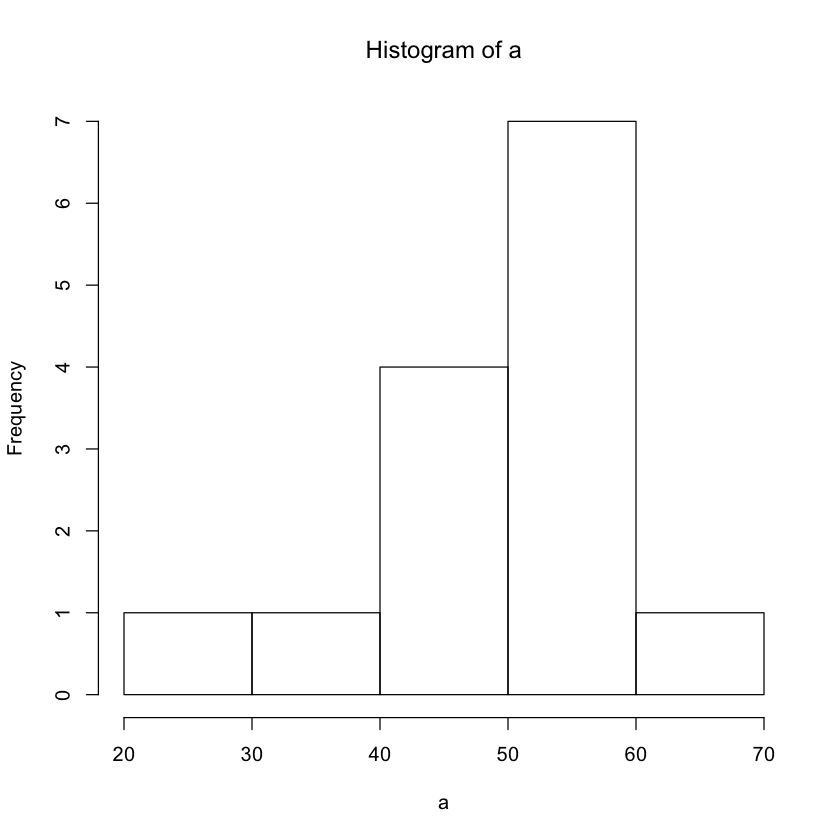

In [17]:
a=c(57, 67, 23, 50, 52, 51, 48, 51, 54, 44, 31, 54, 49, 51)
hist(a)

In [18]:
shapiro.test(a)

# 結果の W は本検定の検定統計量を示す．この検定では，p値が0.02959であるため，有意水準が5%で帰無仮説が棄却され (p ≤ α)，データXの分布は正規分布に従うとはいえない (実質的に従わない) と判断できる．本検定にて計算されるp値はデータ数が4個以上のときは近似的に求められているものである


	Shapiro-Wilk normality test

data:  a
W = 0.8591, p-value = 0.02959


In [6]:
# bayesianAB test
install.packages("bayesAB")


The downloaded binary packages are in
	/var/folders/fs/wtj9_p117y38p0qg40hqrd2h0000gn/T//RtmpV803Qz/downloaded_packages


In [36]:
library(bayesAB)

In [49]:
# 二項分布
# nは取り出す乱数の個数
# sizeは成功回数
# probは成功率

# n=ランディングuu数, prob=cvuu数

set.seed(10)
ncv_a <- rbinom(n=4500, size=1, prob=50/4500)
ncv_b <- rbinom(n=3000, size=1, prob=45/3000)

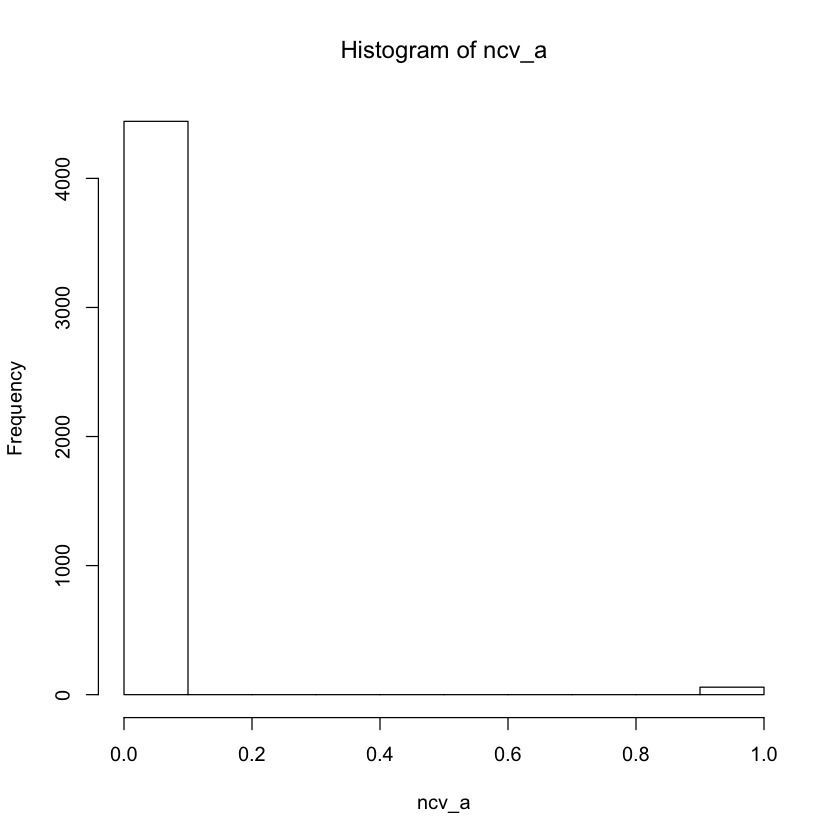

In [50]:
hist(ncv_a)

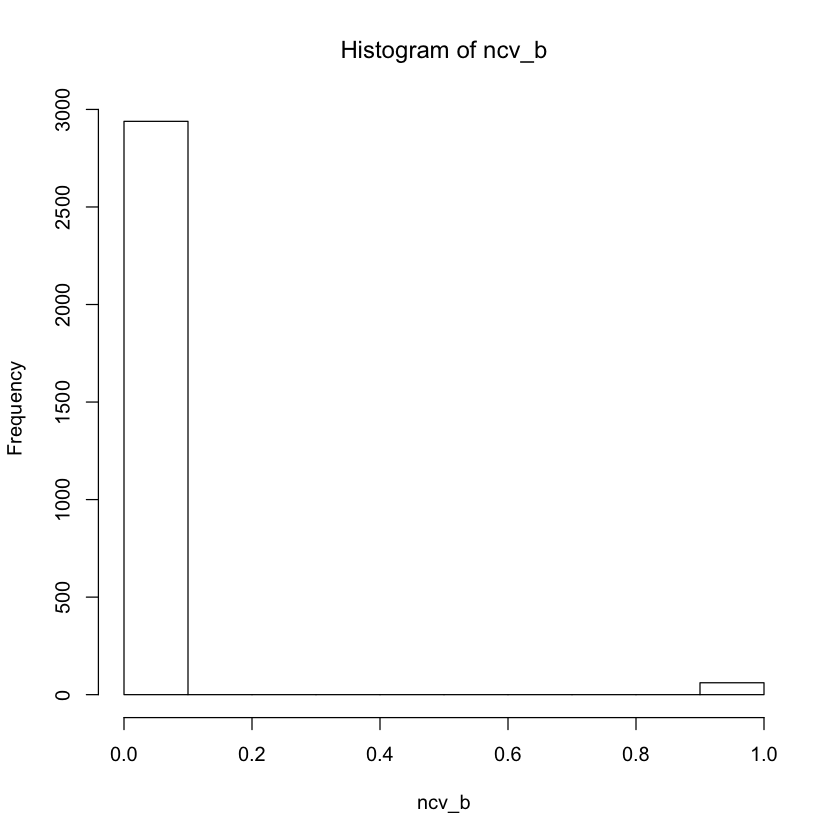

In [51]:
hist(ncv_b)

In [52]:
bayesab <- bayesTest(ncv_a, ncv_b, priors = c('alpha'=1, 'beta'=1), distribution = 'bernoulli')
summary(bayesab)

Quantiles of posteriors for A and B:

$Probability
$Probability$A
         0%         25%         50%         75%        100% 
0.006626894 0.011922682 0.013031148 0.014201461 0.021873532 

$Probability$B
        0%        25%        50%        75%       100% 
0.01150229 0.01885201 0.02056115 0.02234270 0.03344524 


--------------------------------------------

P(A > B) by (0)%: 

$Probability
[1] 0.00563

--------------------------------------------

Credible Interval on (A - B) / B for interval length(s) (0.9) : 

$Probability
        5%        95% 
-0.5298710 -0.1476888 

--------------------------------------------

Posterior Expected Loss for choosing B over A:

$Probability
[1] 0.6043625


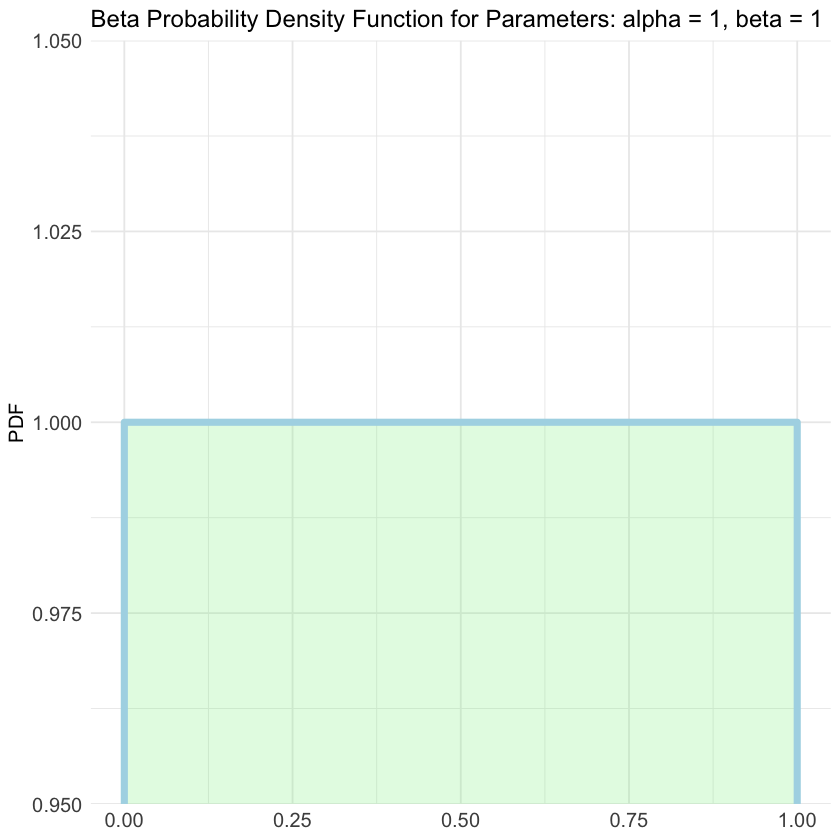

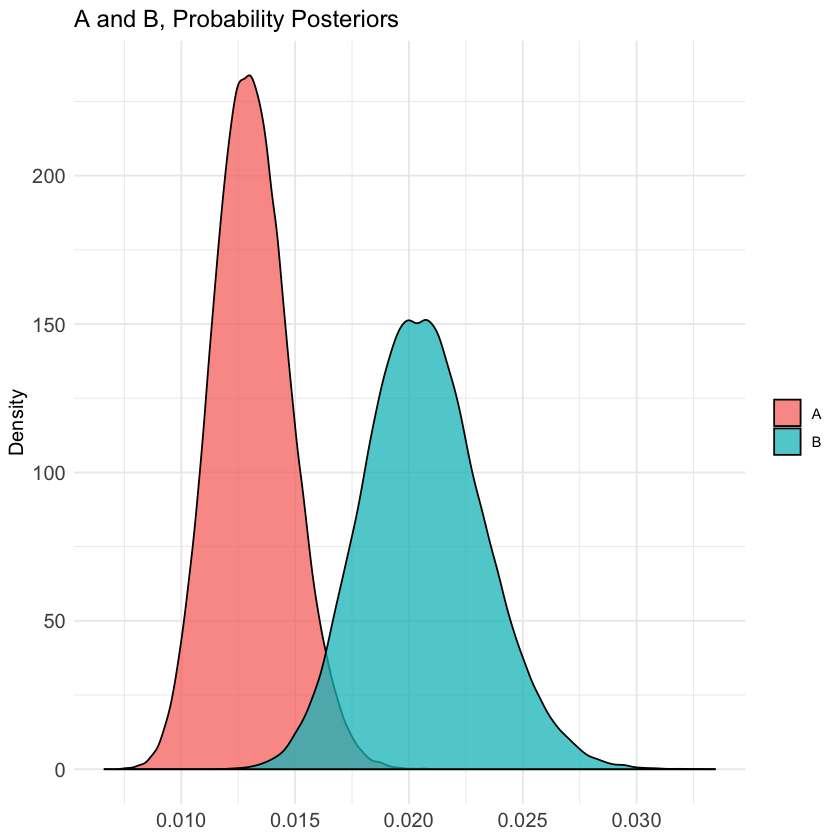

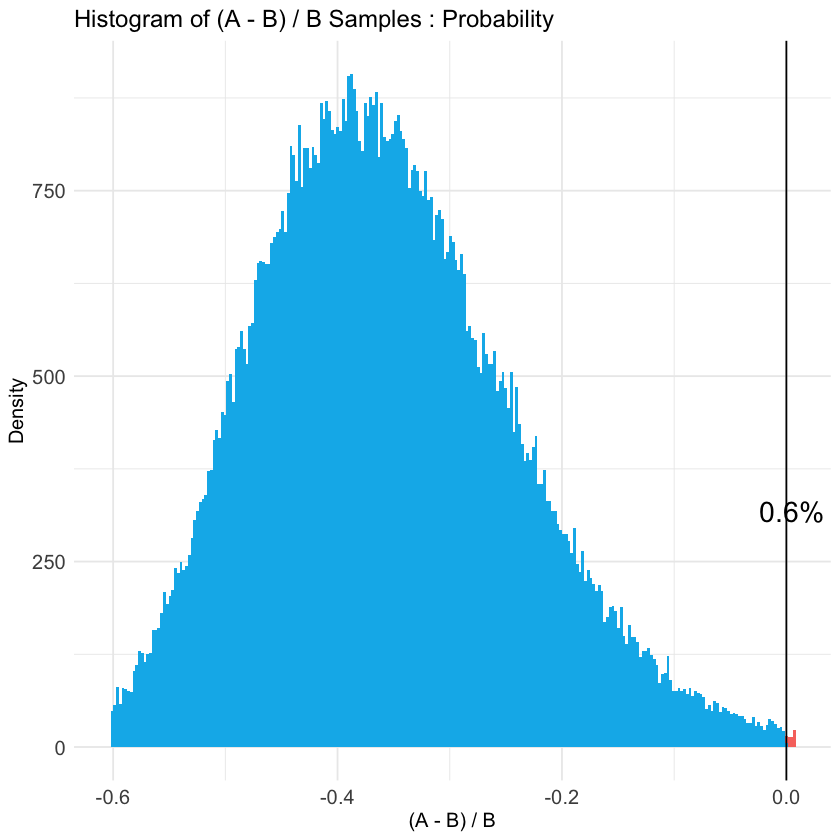

In [53]:
plot(bayesab)

In [56]:
# 二項検定
binom.test(x=567, n=30000, p=0.01, "two.sided")


	Exact binomial test

data:  567 and 30000
number of successes = 567, number of trials = 30000, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.01
95 percent confidence interval:
 0.01738915 0.02050500
sample estimates:
probability of success 
                0.0189 
